In [14]:
import numpy as np
import glob
import datetime
from datetime import date
import os
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import pandas as pd

In [15]:
list_of_files = glob.glob('Daily_all_feature_Weddell_nomissing.txt')  # create the list of file

for i in range(len(list_of_files)):
    files=list_of_files[i]
   # filename=files[43:68] # how do you extract some important info from the filename (!)
   # print(filename)
    with open(files) as f:
        f=[x.strip() for x in f if x.strip()]
        data=[tuple(map(float,x.split())) for x in f[0:]]
        year=np.array([x[0] for x in data])
        mon=np.array([x[1] for x in data])
        day=np.array([x[2] for x in data])
        swd=np.array([x[3] for x in data])
        swu=np.array([x[4] for x in data])
        lwd=np.array([x[5] for x in data])
        lwu=np.array([x[6] for x in data])
        ppt=np.array([x[7] for x in data])
        t=np.array([x[8] for x in data])
        q=np.array([x[9] for x in data])
        u=np.array([x[10] for x in data]) 
        v=np.array([x[11] for x in data])
        al=np.array([x[12] for x in data])
        tc=np.array([x[13] for x in data])
        iwp=np.array([x[14] for x in data])
        cth=np.array([x[15] for x in data])
        cbh=np.array([x[16] for x in data])
        aod=np.array([x[17] for x in data])
        bc=np.array([x[18] for x in data]) 
        ice=np.array([x[19] for x in data])
       # bufn=np.array([x[14] for x in data]) 
   

In [16]:
print(lwd)

[205.312 205.542 207.87  ... 207.374 207.013 206.211]


1. Please plot histograms of any four features in one plot. Use different colors and transparency to make them visible.

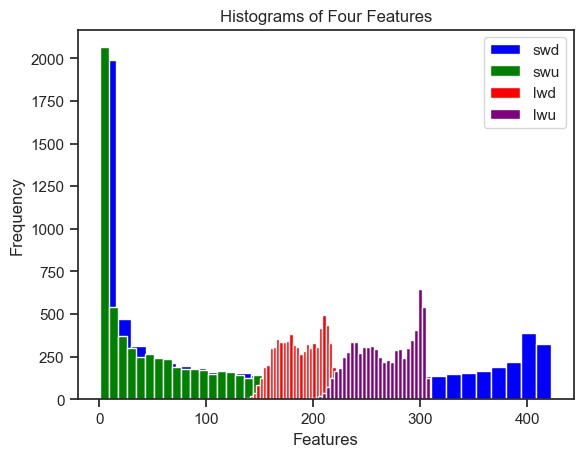

In [17]:
fig, ax = plt.subplots()

# Define the number of bins for the histograms
num_bins = 30

# Plot histograms for each feature with different colors and transparency
ax.hist(swd, num_bins, alpha=1, label='swd', color='blue')
ax.hist(swu, num_bins, alpha=1, label='swu', color='green')
ax.hist(lwd, num_bins, alpha=1, label='lwd', color='red')
ax.hist(lwu, num_bins, alpha=1, label='lwu', color='purple')  # Fixed the label here

ax.set_xlabel('Features')
ax.set_ylabel('Frequency')
ax.set_title('Histograms of Four Features')
ax.legend(loc='upper right')

# Show the plot
plt.show()

2. Please plot these features in a plot and use different axes to include them in one plot.

 a. SWU, T, tc, and ice.

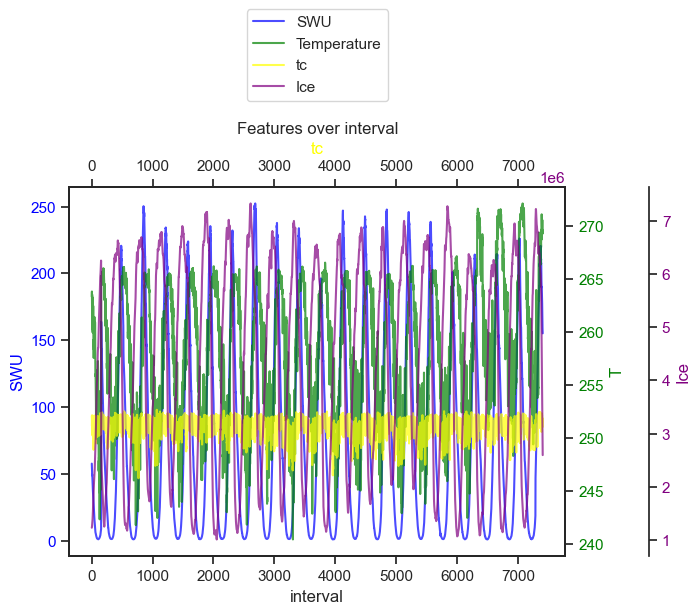

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
interval = np.linspace(0, 7410, 7411)

transparent = 0.7
# Create a figure and axis
fig, ax = plt.subplots()

# Plot SWU with transparency
ax.plot(interval, swu, color='blue', label='SWU', alpha=transparent)
ax.set_xlabel('interval')
ax.set_ylabel('SWU', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Temperature with transparency
ax2 = ax.twinx()
ax2.plot(interval, t, color='green', label='Temperature', alpha=transparent)
ax2.set_ylabel('T', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Create a second x-axis for tc with transparency
ax3 = ax.twiny()
ax3.plot(interval, tc, color='yellow', label='tc', alpha=transparent)
ax3.set_xlabel('tc', color='yellow')

# Create a third y-axis for Ice with transparency
ax4 = ax.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.plot(interval, ice, color='purple', label='Ice', alpha=transparent)
ax4.set_ylabel('Ice', color='purple')
ax4.tick_params(axis='y', labelcolor='purple')

# Combine legends from all axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='upper center', bbox_to_anchor=(0.5, 1.5))

# Show the plot
plt.title('Features over interval')
plt.show()


3. Please plot these features in a plot and use the standardization to include them in one plot.
a. LWU, u, cbh, and ice.

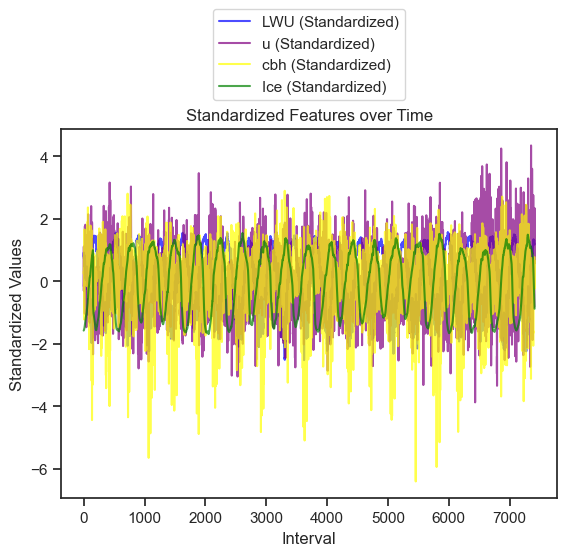

In [19]:
import matplotlib.pyplot as plt
import numpy as np


interval = np.linspace(0, 7410, 7411)  # Sample time points



# Standardize the data
lwu_standardized = (lwu - np.mean(lwu)) / np.std(lwu)
u_standardized = (u - np.mean(u)) / np.std(u)
cbh_standardized = (cbh - np.mean(cbh)) / np.std(cbh)
ice_standardized = (ice - np.mean(ice)) / np.std(ice)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot standardized data
ax.plot(interval, lwu_standardized, color = 'blue', label='LWU (Standardized)', alpha = transparent)
ax.plot(interval, u_standardized, color = 'purple',label='u (Standardized)', alpha = transparent)
ax.plot(interval, cbh_standardized, color = 'yellow', label='cbh (Standardized)', alpha = transparent)
ax.plot(interval, ice_standardized, color= 'green' ,label='Ice (Standardized)', alpha = transparent)

# Set labels and legend
ax.set_xlabel('Interval')
ax.set_ylabel('Standardized Values')
ax.legend(loc = 'center',  bbox_to_anchor=(0.5, 1.2))



# Show the plot
plt.title('Standardized Features over Time')
plt.show()


4. Make two box diagrams (any two features of your choice) in one plot and plot them in different colors so that they are easily distinguishable.

In [20]:
print(swu)

print(swd)

print(lwd)

[ 57.612  56.577  54.667 ... 157.224 155.452 155.149]
[184.765 180.71  175.756 ... 407.323 406.192 405.917]
[205.312 205.542 207.87  ... 207.374 207.013 206.211]


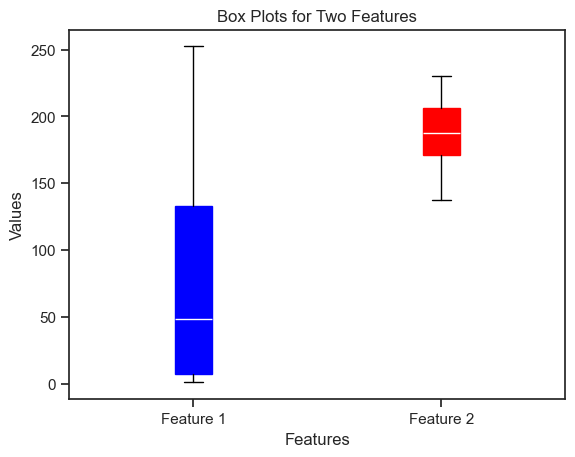

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data for two features (you can replace this with your data)

feature1 = swu
feature2 = lwd  # Shift feature2 for differentiation

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot for feature1 in blue
ax.boxplot(feature1, positions=[1], labels=['Feature 1'], patch_artist=True,
           boxprops=dict(facecolor='blue', color='blue'), medianprops=dict(color='white'))

# Create a box plot for feature2 in red
ax.boxplot(feature2, positions=[2], labels=['Feature 2'], patch_artist=True,
           boxprops=dict(facecolor='red', color='red'), medianprops=dict(color='white'))

# Set labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Box Plots for Two Features')

# Show the plot
plt.show()


5. Now Load the wine dataset and plot a scatterplot matrix and a heat map.

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.

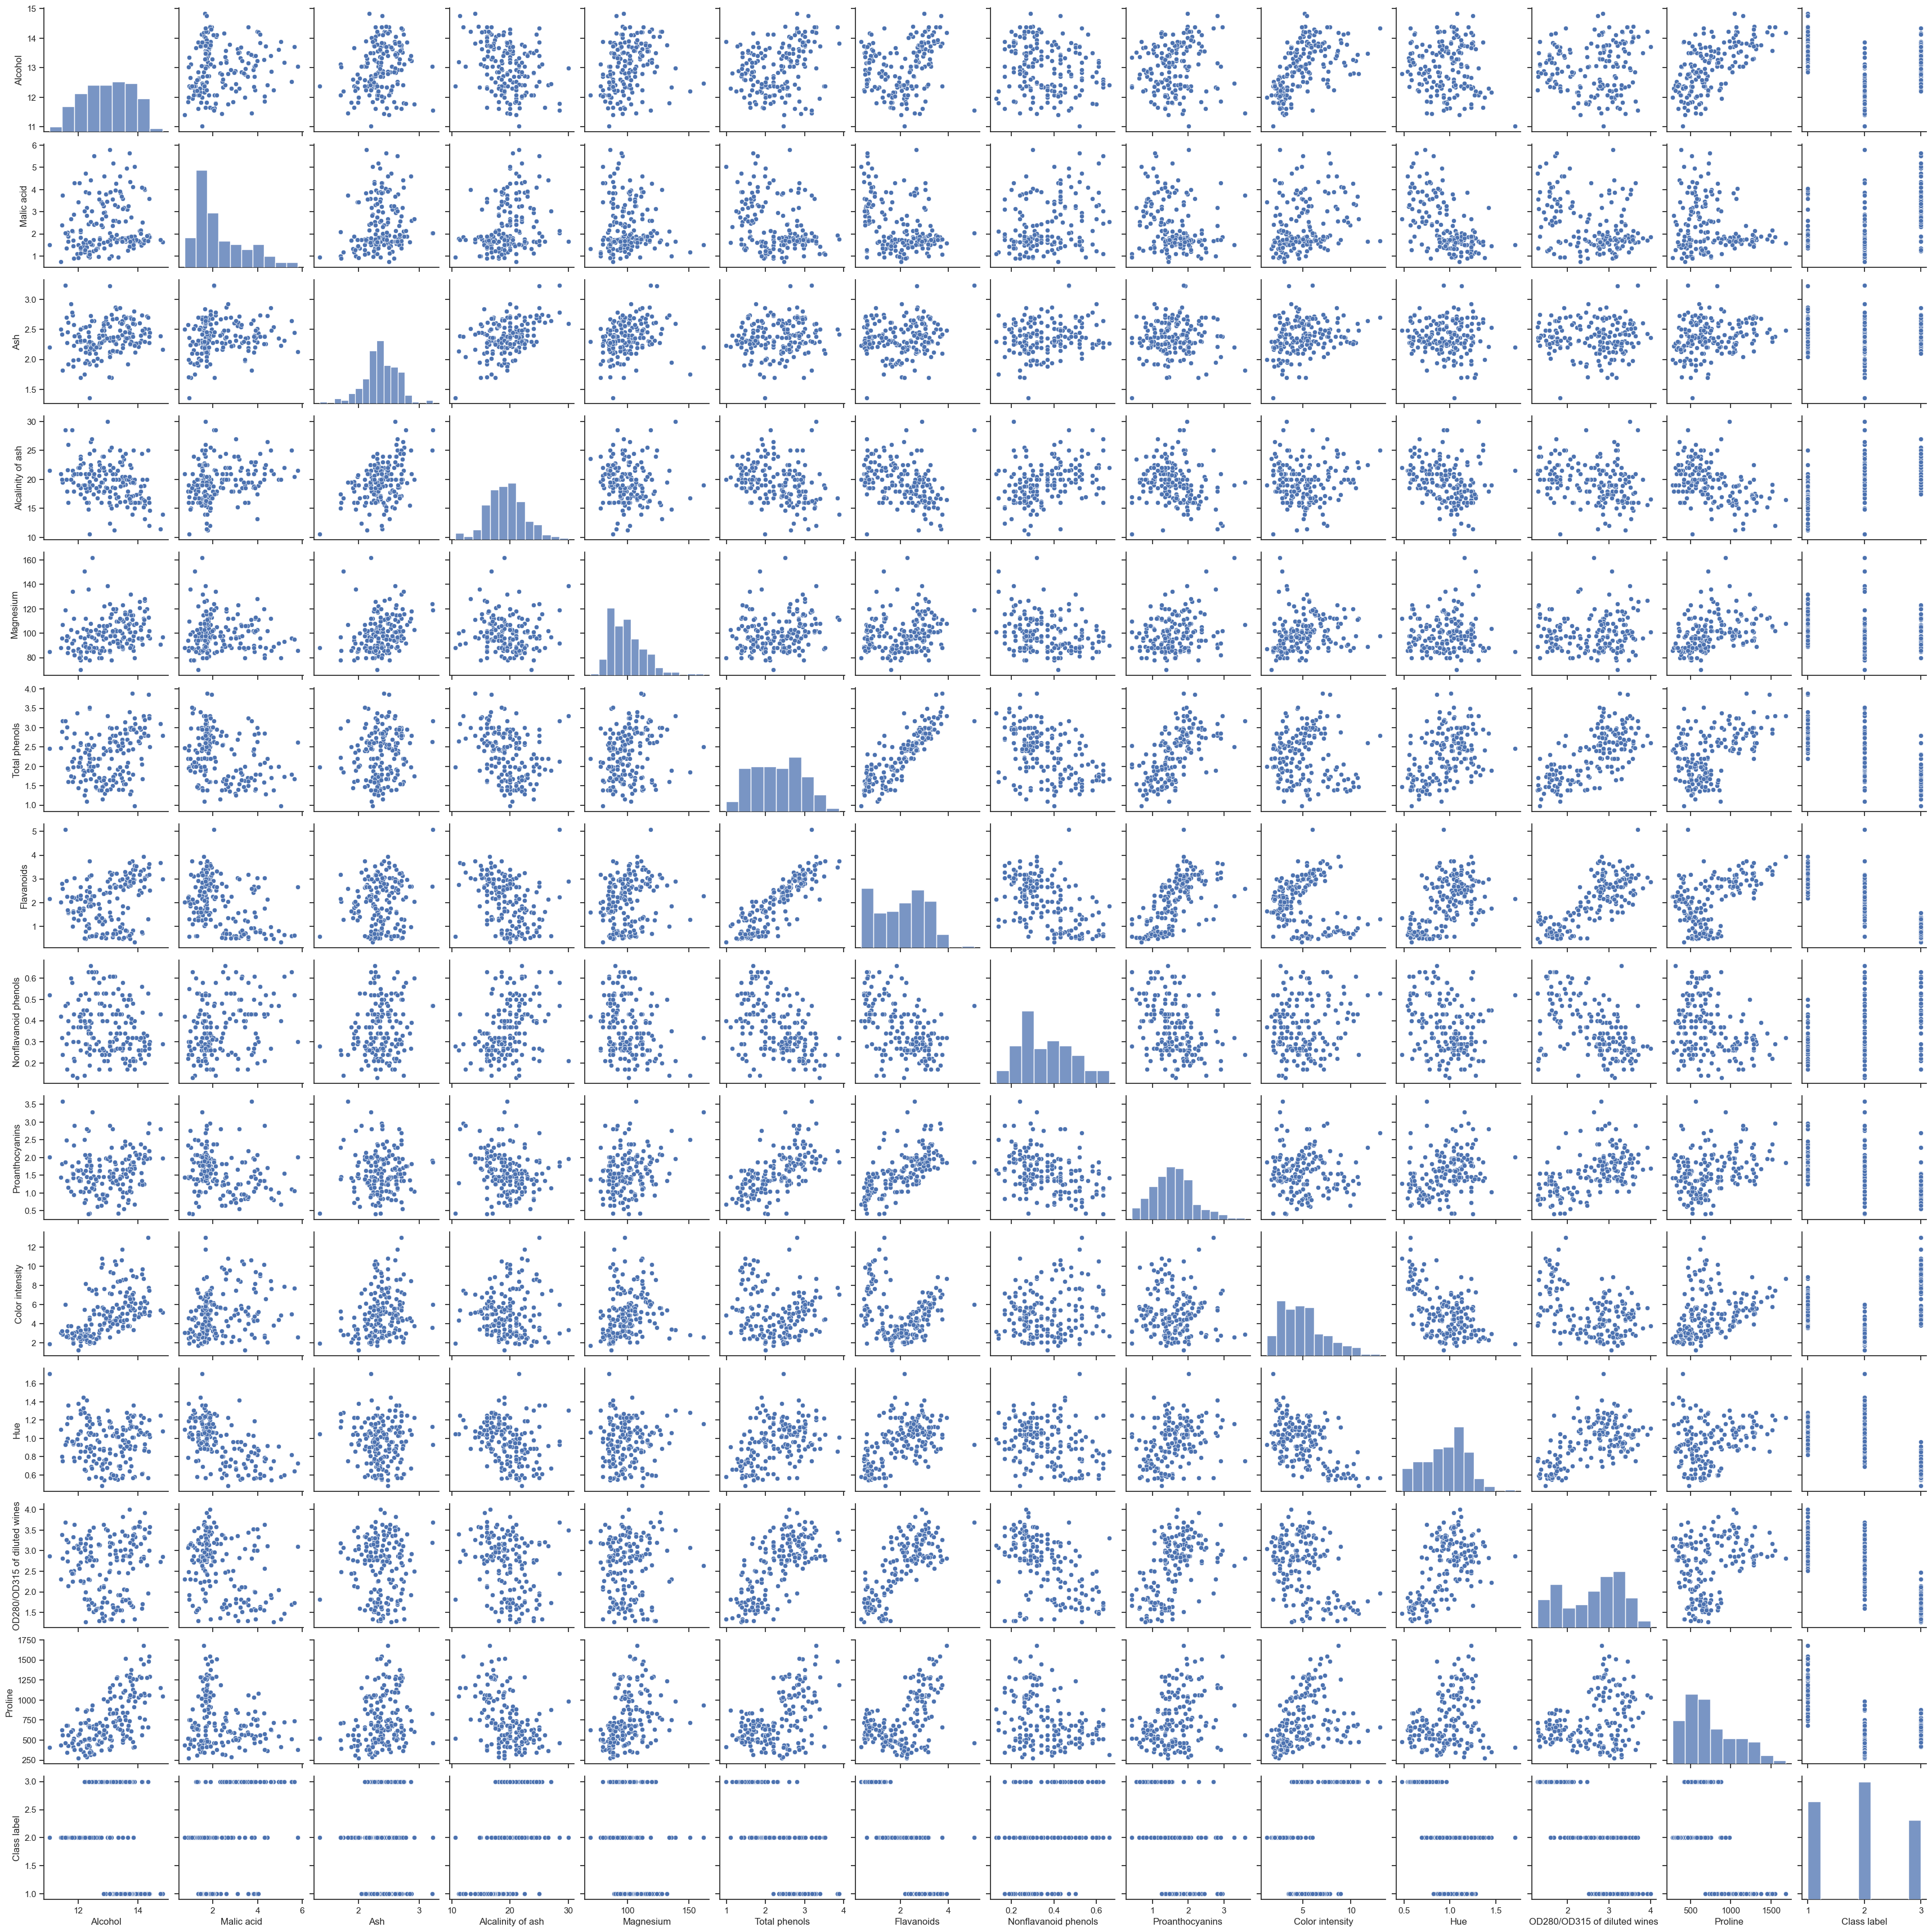

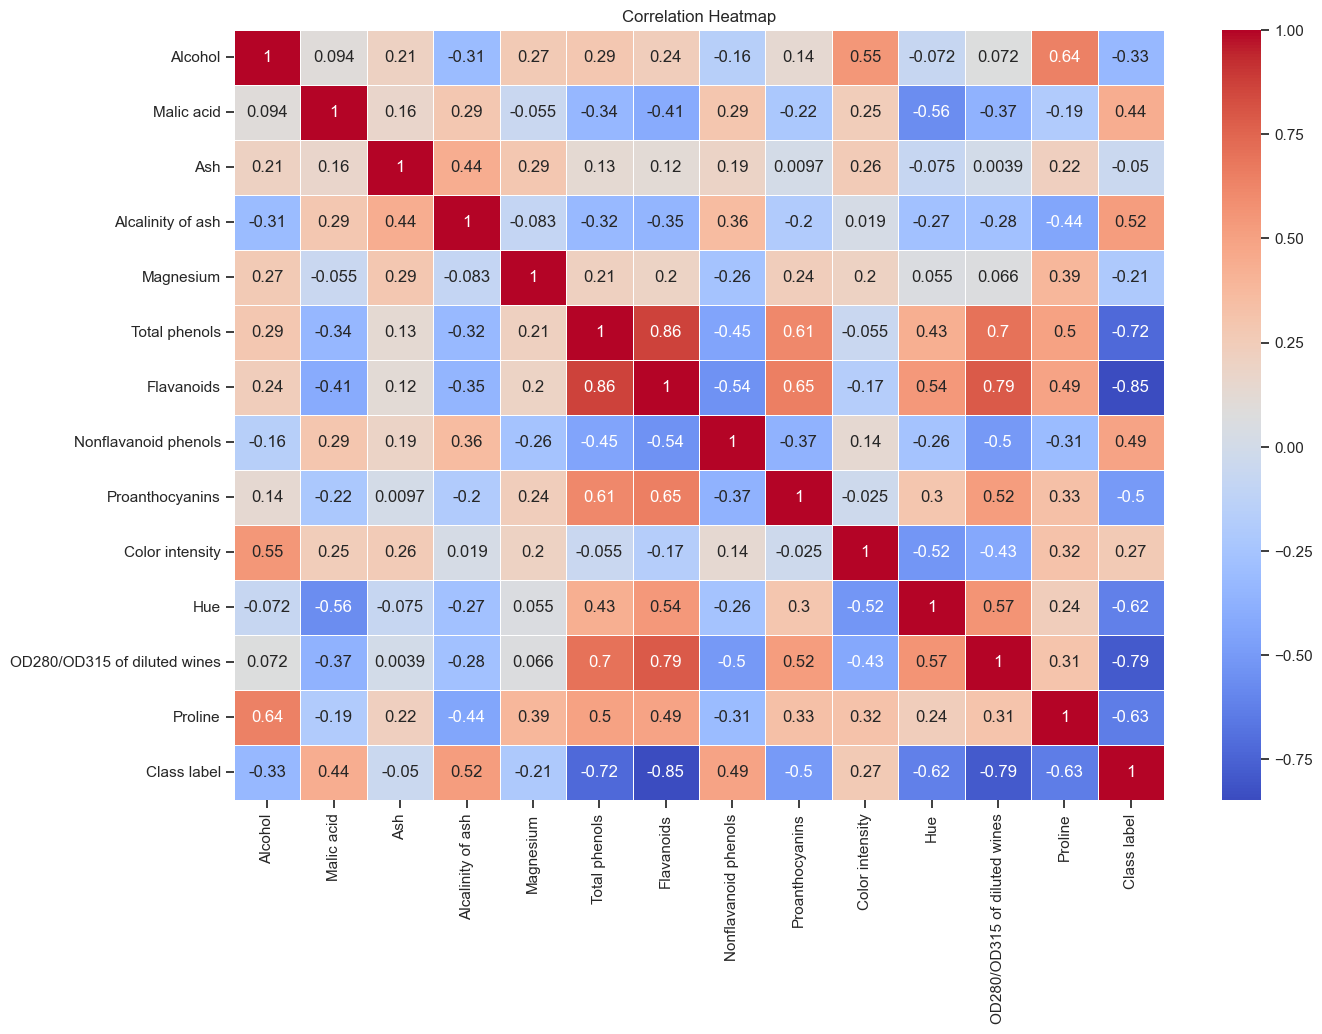

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
'ml/machine-learning-databases/wine/wine.data',
header=None)
print(df_wine.keys())

df_wine.columns = ['Class label','Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']







wine_data = df_wine
class_label_column = df_wine.pop('Class label')
df_wine.insert(len(df_wine.columns), 'Class label', class_label_column)

# Now df_wine has the 'Class label' column at the rightmost position
print(df_wine.head())


# Scatterplot matrix
sns.set(style="ticks")
sns.pairplot(wine_data)
plt.show()
# Scatterplot matrix



# Correlation heatmap
corr_matrix = wine_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()







6. Plot the histograms for the proline concentrations in wine class levels 1 and 3. Then plot the Gaussian distribution function for proline on top of the histograms. You might see multiple lines when you plot the distribution since the Proline values are not in order. That’s why lines begin from one value and jump to the other and many lines appear. Can you fix that problem and plot just one line?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


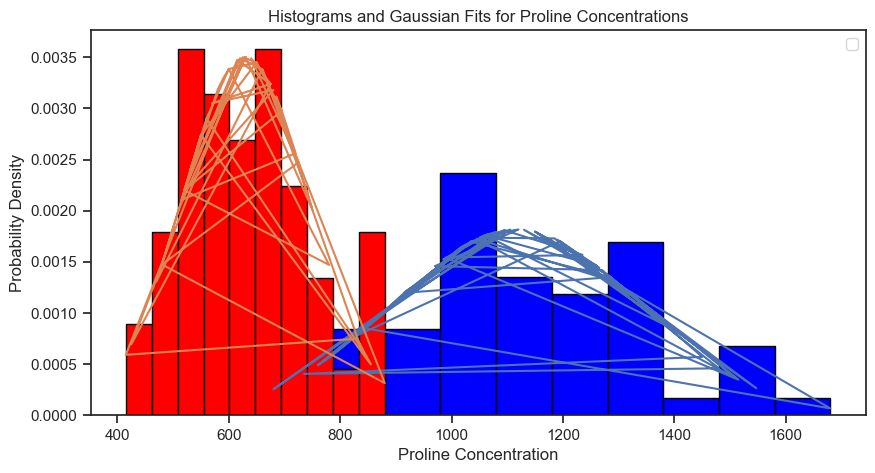

In [23]:
# Sample data

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have a DataFrame 'df' with a column named 'proline' containing the proline concentration data for classes 1 and 3

df = df_wine

# Filter the DataFrame to get data for class 1 and class 3
proline_class1 = df[df['Class label'] == 1]['Proline'].values
proline_class2 = df[df['Class label'] == 2]['Proline'].values
proline_class3 = df[df['Class label'] == 3]['Proline'].values

# Create histograms
plt.figure(figsize=(10, 5))








#gaussian
from scipy.stats import norm


xx1=np.zeros(len(proline_class1))


for i in range(len(proline_class1)):#240,270
    xx1[i]=norm.pdf(int(proline_class1[i]), np.mean(proline_class1), np.std(proline_class1))



xx2=np.zeros(len(proline_class2))


for i in range(len(proline_class2)):#240,270
    xx2[i]=norm.pdf(int(proline_class2[i]), np.mean(proline_class2), np.std(proline_class2))

xx3=np.zeros(len(proline_class3))
for i in range(len(proline_class3)):
    xx3[i]=norm.pdf(int(proline_class3[i]), np.mean(proline_class3), np.std(proline_class3))





plt.hist(proline_class1, density=True, edgecolor='black', color = 'blue')
plt.plot(proline_class1,xx1)

plt.hist(proline_class3, density=True, edgecolor='black', color = 'red')
plt.plot(proline_class3,xx3)


plt.xlabel('Proline Concentration')
plt.ylabel('Probability Density')
plt.title('Histograms and Gaussian Fits for Proline Concentrations')
plt.legend()

# Show the plot
plt.show()


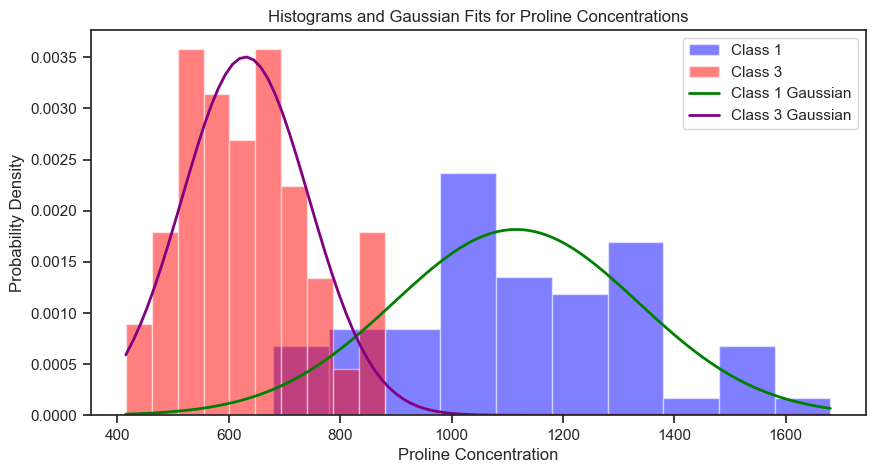

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have a DataFrame 'df' with a column named 'Proline' containing the proline concentration data for classes 1 and 3

df = df_wine

# Filter the DataFrame to get data for class 1 and class 3
proline_class1 = df[df['Class label'] == 1]['Proline'].values
proline_class3 = df[df['Class label'] == 3]['Proline'].values

# Calculate mean and standard deviation for each class
mean_class1 = np.mean(proline_class1)
std_dev_class1 = np.std(proline_class1)

mean_class3 = np.mean(proline_class3)
std_dev_class3 = np.std(proline_class3)

# Create histograms
plt.figure(figsize=(10, 5))

# Histogram for class 1
plt.hist(proline_class1,  density=True, alpha=0.5, color='blue', label='Class 1')

# Histogram for class 3
plt.hist(proline_class3,  density=True, alpha=0.5, color='red', label='Class 3')

# Generate x values for the Gaussian distribution curves
x = np.linspace(min(min(proline_class1), min(proline_class3)), max(max(proline_class1), max(proline_class3)), 100)

# Plot Gaussian distribution curve for class 1
plt.plot(x, norm.pdf(x, mean_class1, std_dev_class1), color='green', linestyle='-', label='Class 1 Gaussian', linewidth=2)

# Plot Gaussian distribution curve for class 3
plt.plot(x, norm.pdf(x, mean_class3, std_dev_class3), color='purple', linestyle='-', label='Class 3 Gaussian', linewidth=2)

plt.xlabel('Proline Concentration')
plt.ylabel('Probability Density')
plt.title('Histograms and Gaussian Fits for Proline Concentrations')
plt.legend()

# Show the plot
plt.show()


7. What is the probability of having a concentration of
a. 600 and 1400 in class 1 wine
b. 400 and 1200 in class 3 wine.

In [25]:
from scipy.stats import norm


# a. Probability for class 1 wine: Proline concentrations 600 and 1400
prob_class1_600 = norm.pdf(600, proline_class1.mean(), proline_class1.std())
prob_class1_1400 = norm.pdf(1400, proline_class1.mean(), proline_class1.std())

# b. Probability for class 3 wine: Proline concentrations 400 and 1200
prob_class3_400 = norm.pdf(400, proline_class3.mean(), proline_class3.std())
prob_class3_1200 = norm.pdf(1200, proline_class3.mean(), proline_class3.std())

# c. Choose wine with lower Proline concentration
wine_choice = 1 if proline_class1.mean() < proline_class3.mean() else 3

print(f'a. Probability for 600 in class 1 wine: {prob_class1_600:.4f}')
print(f'   Probability for 1400 in class 1 wine: {prob_class1_1400:.4f}')
print(f'b. Probability for 400 in class 3 wine: {prob_class3_400:.4f}')
print(f'   Probability for 1200 in class 3 wine: {prob_class3_1200:.4f}')
print(f'c. If someone dislikes the taste of Proline, they should choose wine class: {wine_choice}')

# Calculate the probabilities for Class 1


print('\n**********************\n')
print('Additional analysis')
print('If we consider joint probablity of concentration')
prob_concentration_600_class1 = norm.pdf(600, mean_class1, std_dev_class1)
prob_concentration_1400_class1 = norm.pdf(1400, mean_class1, std_dev_class1)

# Calculate the joint probability for both events (600 and 1400)
joint_probability_class1 = prob_concentration_600_class1 * prob_concentration_1400_class1

print(f"Probability of concentration 600 and 1400 in Class 1 wine: {joint_probability_class1:.6f}")


# Calculate the probabilities for Class 3
prob_concentration_400_class3 = norm.pdf(400, mean_class3, std_dev_class3)
prob_concentration_1200_class3 = norm.pdf(1200, mean_class3, std_dev_class3)

# Calculate the joint probability for both events (400 and 1200)
joint_probability_class3 = prob_concentration_400_class3 * prob_concentration_1200_class3

print(f"Probability of concentration 400 and 1200 in Class 3 wine: {joint_probability_class3:.6f}")


a. Probability for 600 in class 1 wine: 0.0001
   Probability for 1400 in class 1 wine: 0.0008
b. Probability for 400 in class 3 wine: 0.0005
   Probability for 1200 in class 3 wine: 0.0000
c. If someone dislikes the taste of Proline, they should choose wine class: 3

**********************

Additional analysis
If we consider joint probablity of concentration
Probability of concentration 600 and 1400 in Class 1 wine: 0.000000
Probability of concentration 400 and 1200 in Class 3 wine: 0.000000


c. If someone dislikes the taste of Proline and likes to drink wine, which wine should he
choose?


Answer : Answer : Class 3 should be selected. Upon examining the figure below, it is evident that class 3 has lower spread of proline concentration, indicating a corresponding low level of concentration.




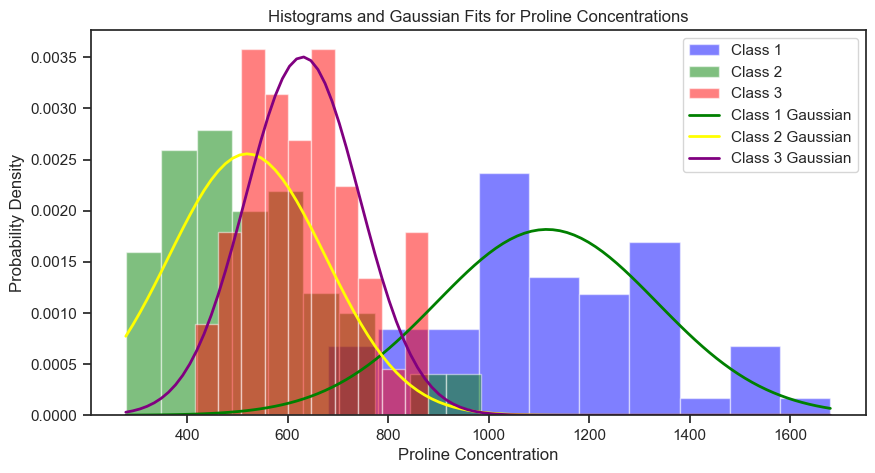

In [26]:
# Answer : Class 3 should be selected. Upon examining the figure below, it is evident that 
#class 3 has lower spread of proline concentration, indicating a corresponding low level of concentration.




import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have a DataFrame 'df' with a column named 'Proline' containing the proline concentration data for classes 1 and 3

df = df_wine

# Filter the DataFrame to get data for class 1 and class 3
proline_class1 = df[df['Class label'] == 1]['Proline'].values
proline_class2 = df[df['Class label'] == 2]['Proline'].values
proline_class3 = df[df['Class label'] == 3]['Proline'].values

# Calculate mean and standard deviation for each class
mean_class1 = np.mean(proline_class1)
std_dev_class1 = np.std(proline_class1)

mean_class2 = np.mean(proline_class2)
std_dev_class2 = np.std(proline_class2)

mean_class3 = np.mean(proline_class3)
std_dev_class3 = np.std(proline_class3)

# Create histograms
plt.figure(figsize=(10, 5))

# Histogram for class 1
plt.hist(proline_class1,  density=True, alpha=0.5, color='blue', label='Class 1')


plt.hist(proline_class2,  density=True, alpha=0.5, color='green', label='Class 2')
# Histogram for class 3
plt.hist(proline_class3,  density=True, alpha=0.5, color='red', label='Class 3')

# Generate x values for the Gaussian distribution curves
x = np.linspace(min(min(proline_class1), min(proline_class2),min(proline_class3)), max(max(proline_class1),max(proline_class2), max(proline_class3)), 100)

# Plot Gaussian distribution curve for class 1
plt.plot(x, norm.pdf(x, mean_class1, std_dev_class1), color='green', linestyle='-', label='Class 1 Gaussian', linewidth=2)




plt.plot(x, norm.pdf(x, mean_class2, std_dev_class2), color='yellow', linestyle='-', label='Class 2 Gaussian', linewidth=2)

# Plot Gaussian distribution curve for class 3
plt.plot(x, norm.pdf(x, mean_class3, std_dev_class3), color='purple', linestyle='-', label='Class 3 Gaussian', linewidth=2)

plt.xlabel('Proline Concentration')
plt.ylabel('Probability Density')
plt.title('Histograms and Gaussian Fits for Proline Concentrations')
plt.legend()

# Show the plot
plt.show()